# House Price Prediction Model

**Descripton** Previous model had only one feature (`size`) to predict the price of the house. In real-world, there are many factors like `# bedrooms`, `# bathrooms`, `city`, etc that affect the price of the house. In this project, I will use `Multiple Linear Regression` to predict the price of the house via  


In [176]:
import pandas as pd

In [177]:
data_set = pd.read_csv("./data/zameen.csv", delimiter="|")

In [178]:
data_set.head()

,city,location,price,bedrooms,baths,size
0,Lahore,"DHA Phase 6, DHA Defence",74500000,5,6,4500.0
1,Lahore,"DHA Phase 7, DHA Defence",51500000,5,6,4500.0
2,Lahore,"Dream Gardens, Defence Road",7500000,1,1,518.0
3,Lahore,"DHA Phase 6, DHA Defence",73000000,5,6,4500.0
4,Lahore,"Bahria Town - Sector B, Bahria Town",5700000,1,1,472.0


In [179]:
# find the missing values if any
data_set.isna().sum()

city        0
location    0
price       0
bedrooms    0
baths       0
size        0
dtype: int64

In [180]:
# make lahore column as integer
# cities to keep
cities = data_set["city"].unique()

for city in cities:
    data_set[city] = 0
    data_set.loc[data_set["city"] == city, city] = 1

data_set

,city,location,price,bedrooms,baths,size,Lahore,Karachi,Islamabad,Multan,Faisalabad,Peshawar,Quetta,Rawalpindi,Murree,Gujranwala,Attock
0,Lahore,"DHA Phase 6, DHA Defence",74500000,5,6,4500.0,1,0,0,0,0,0,0,0,0,0,0
1,Lahore,"DHA Phase 7, DHA Defence",51500000,5,6,4500.0,1,0,0,0,0,0,0,0,0,0,0
2,Lahore,"Dream Gardens, Defence Road",7500000,1,1,518.0,1,0,0,0,0,0,0,0,0,0,0
3,Lahore,"DHA Phase 6, DHA Defence",73000000,5,6,4500.0,1,0,0,0,0,0,0,0,0,0,0
4,Lahore,"Bahria Town - Sector B, Bahria Town",5700000,1,1,472.0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,Attock,"Multi Residencia Orchards Brahma Bahtar, Attock",14000000,3,3,1125.0,0,0,0,0,0,0,0,0,0,0,1
16015,Attock,"Cantt, Attock",6500000,4,3,1125.0,0,0,0,0,0,0,0,0,0,0,1
16016,Attock,"Attock Road, Attock",4163000,2,1,562.0,0,0,0,0,0,0,0,0,0,0,1
16017,Attock,"Madni Colony, Attock",22500000,5,4,2250.0,0,0,0,0,0,0,0,0,0,0,1


<AxesSubplot: >

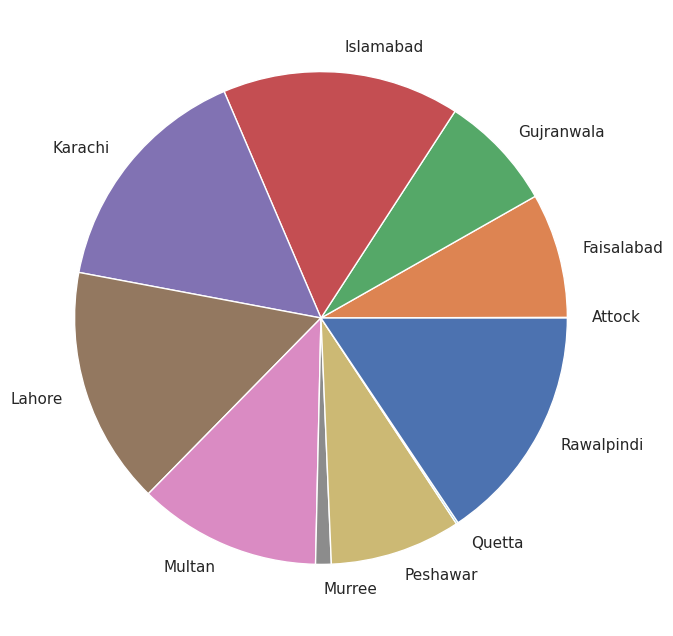

In [181]:
# make a pie chart for this data set
data_set.groupby("city").size().plot(kind="pie", figsize=(8,8))

In [182]:
data_set = data_set.drop(["city", "location"], axis = 1)

data_set.describe()

,price,bedrooms,baths,size,Lahore,Karachi,Islamabad,Multan,Faisalabad,Peshawar,Quetta,Rawalpindi,Murree,Gujranwala,Attock
count,1.601900e+04,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000,16019.000000
mean,4.570646e+07,3.771833,4.051127,2463.783133,0.156065,0.156065,0.155877,0.120045,0.081778,0.085960,0.001249,0.156065,0.010238,0.076222,0.000437
std,8.510389e+07,1.984033,2.131803,4571.652946,0.362928,0.362928,0.362750,0.325024,0.274035,0.280314,0.035313,0.362928,0.100666,0.265361,0.020900
min,7.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+07,3.000000,3.000000,1125.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.400000e+07,4.000000,4.000000,1575.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.500000e+07,5.000000,6.000000,2700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.100000e+09,11.000000,10.000000,315000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
